## Objective

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as st

## Loading dataset

In [2]:
df = pd.read_csv("../datasets/Seasonwiseprocurementdetails2023_0.csv")

In [3]:
df.columns

Index(['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers',
       'Amount(Rs)'],
      dtype='object')

In [4]:
df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762.0,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62.0,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127.0,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681.0,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173.0,5228800.0
...,...,...,...,...,...,...
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027.0,518384525.0
97,YSR,Turmeric Bulb,Rabi 2021-22,16.8,3.0,115080.0
98,YSR,NaN,Kharif-2020,2201.0,NaN,4001550.0
99,VIZIANAGARAM,Maize,Kharif-2020,206721.0,6947.0,367660675.0


## Before cleaning dataset

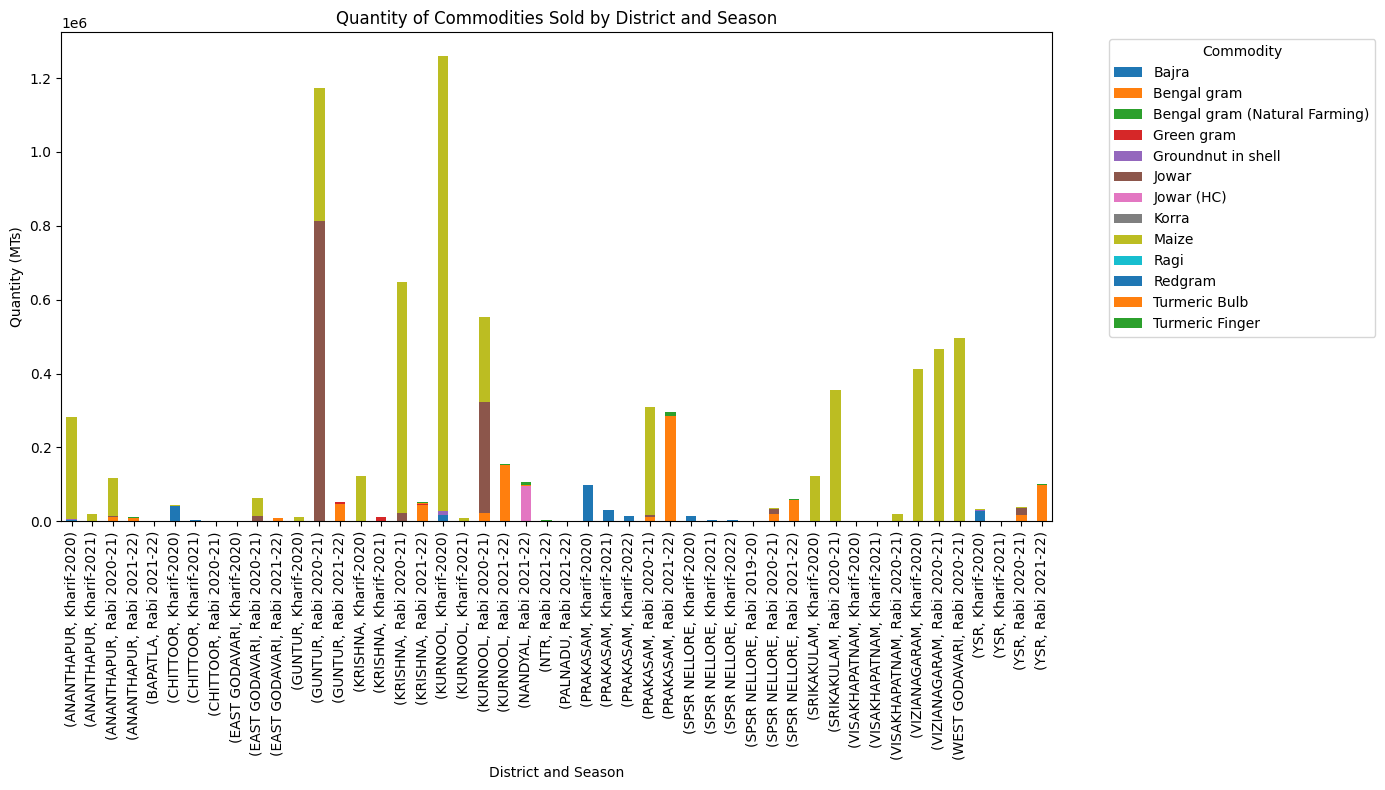

In [5]:
pivot_table = df.pivot_table(index=['District', 'Season'], columns='Commodity', values='Qty(MTs)', aggfunc='sum', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

# Add labels and title
plt.xlabel('District and Season')
plt.ylabel('Quantity (MTs)')
plt.title('Quantity of Commodities Sold by District and Season')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

## Identify needed data ponts

In [6]:
df.shape

(101, 6)

In [7]:
df = df[['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers', 'Amount(Rs)']]

In [8]:
df[df.duplicated()]

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
99,VIZIANAGARAM,Maize,Kharif-2020,206721.0,6947.0,367660675.0
100,YSR,Groundnut in shell,Kharif-2020,1370.1,193.0,7003925.0


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(99, 6)

## Identify and remove null values

In [10]:
df.isnull().sum()

District         0
Commodity        1
Season           1
Qty(MTs)         0
No of Farmers    1
Amount(Rs)       1
dtype: int64

In [11]:
(1 / len(df)) * 100

1.0101010101010102

In [12]:
df.dropna(inplace=True)
df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762.0,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62.0,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127.0,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681.0,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173.0,5228800.0
...,...,...,...,...,...,...
93,YSR,Bajra,Kharif-2020,28491.0,1377.0,60667625.0
94,YSR,Maize,Kharif-2020,2201.0,85.0,4001550.0
95,YSR,Bengal gram,Rabi 2020-21,16110.0,1215.0,81515850.0
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027.0,518384525.0


In [13]:
df.shape

(97, 6)

## Adjusting datatypes

In [14]:
df.dtypes

District          object
Commodity         object
Season            object
Qty(MTs)         float64
No of Farmers    float64
Amount(Rs)       float64
dtype: object

In [15]:
df["No of Farmers"] = df["No of Farmers"].astype("int64")
df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0
...,...,...,...,...,...,...
93,YSR,Bajra,Kharif-2020,28491.0,1377,60667625.0
94,YSR,Maize,Kharif-2020,2201.0,85,4001550.0
95,YSR,Bengal gram,Rabi 2020-21,16110.0,1215,81515850.0
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027,518384525.0


## Replace values

In [16]:
df.replace(['Maize', 'Bajra'], ['Corn', 'Pearl Millet'], inplace=True)
df.replace(['Rabi 2019-20', 'Rabi 2020-21', 'Rabi 2021-22'], ['Rabi 2020', 'Rabi 2021', 'Rabi 2022'], inplace=True)
df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Corn,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2021,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2022,9333.5,681,48814205.0
4,ANANTHAPUR,Pearl Millet,Kharif-2020,3193.0,173,5228800.0
...,...,...,...,...,...,...
93,YSR,Pearl Millet,Kharif-2020,28491.0,1377,60667625.0
94,YSR,Corn,Kharif-2020,2201.0,85,4001550.0
95,YSR,Bengal gram,Rabi 2021,16110.0,1215,81515850.0
96,YSR,Bengal gram,Rabi 2022,99117.5,6027,518384525.0


## Analysis

In [17]:
df.describe()

,Qty(MTs),No of Farmers,Amount(Rs)
count,9.700000e+01,97.000000,9.700000e+01
mean,7.656789e+04,1854.247423,1.718125e+08
std,1.842849e+05,3494.834152,3.554619e+08
min,1.680000e+01,3.000000,1.150800e+05
25%,1.158000e+03,88.000000,4.448325e+06
50%,7.270500e+03,358.000000,2.489084e+07
75%,4.146400e+04,1776.000000,9.531705e+07
max,1.232776e+06,18614.000000,1.974546e+09


In [18]:
df["No of Farmers"].value_counts(normalize=True)

No of Farmers
3       0.030928
8       0.020619
27      0.020619
521     0.020619
23      0.020619
          ...   
783     0.010309
1377    0.010309
85      0.010309
1215    0.010309
6027    0.010309
Name: proportion, Length: 89, dtype: float64

## Identifying outliers

<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

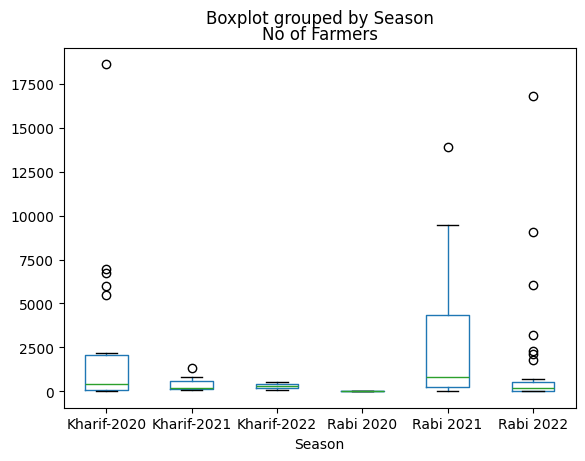

In [19]:
df.boxplot(by="Season", column=["No of Farmers"], grid=False)

<Axes: title={'center': 'Qty(MTs)'}, xlabel='Season'>

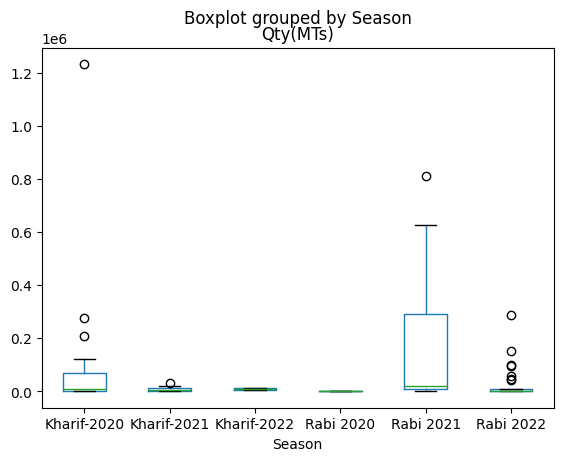

In [20]:
df.boxplot(by="Season", column=["Qty(MTs)"], grid=False)

<Axes: title={'center': 'Amount(Rs)'}, xlabel='Season'>

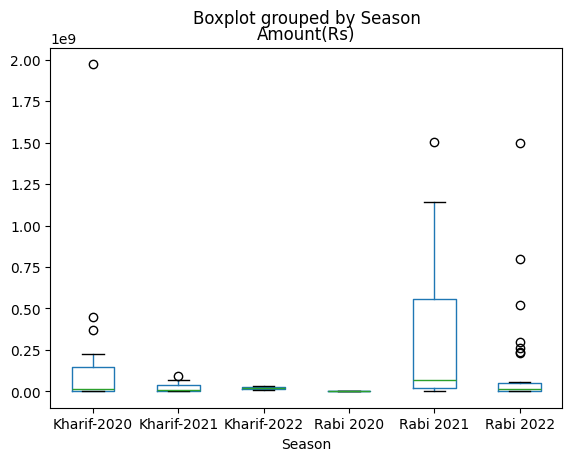

In [21]:
df.boxplot(by="Season", column=["Amount(Rs)"], grid=False)

In [22]:
df1 = df[['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers', 'Amount(Rs)']]
df2 = df[['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers', 'Amount(Rs)']]
df3 = df[['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers', 'Amount(Rs)']]

## Removing outliers with IQR

In [23]:
for column in ["No of Farmers", "Qty(MTs)", "Amount(Rs)"]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    lower_boundary = q1 - 1.5 * IQR
    upper_boundary = q3 + 1.5 * IQR
    print(q1, q3, IQR, lower_boundary, upper_boundary)
    df1 = df1[(df1[column] >= lower_boundary) & (df1[column] <= upper_boundary)]

88.0 1776.0 1688.0 -2444.0 4308.0
1158.0 41464.0 40306.0 -59301.0 101923.0
4448325.0 95317050.0 90868725.0 -131854762.5 231620137.5


In [24]:
df1.shape

(74, 6)

In [25]:
df1.describe()

,Qty(MTs),No of Farmers,Amount(Rs)
count,74.000000,74.000000,7.400000e+01
mean,7391.850000,360.378378,2.342440e+07
std,9920.734238,456.746856,2.819880e+07
min,16.800000,3.000000,1.150800e+05
25%,746.400000,57.500000,2.754728e+06
50%,2682.750000,178.500000,9.011250e+06
75%,10966.750000,488.750000,3.817305e+07
max,48260.000000,1992.000000,1.173332e+08


<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

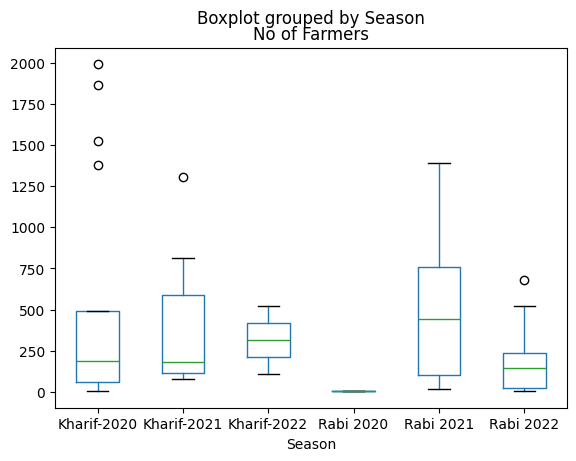

In [26]:
df1.boxplot(by="Season", column=["No of Farmers"], grid=False)

<Axes: title={'center': 'Qty(MTs)'}, xlabel='Season'>

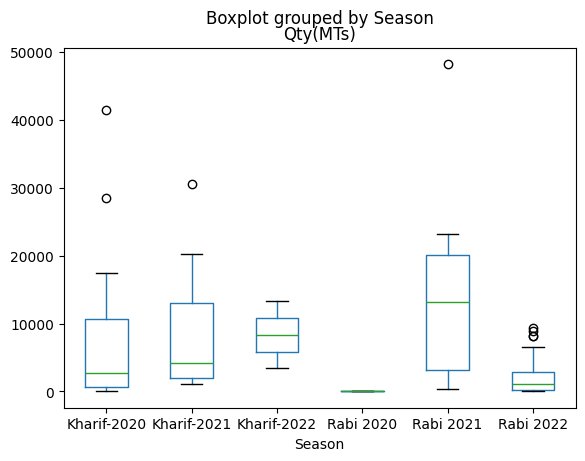

In [27]:
df1.boxplot(by="Season", column=["Qty(MTs)"], grid=False)

<Axes: title={'center': 'Amount(Rs)'}, xlabel='Season'>

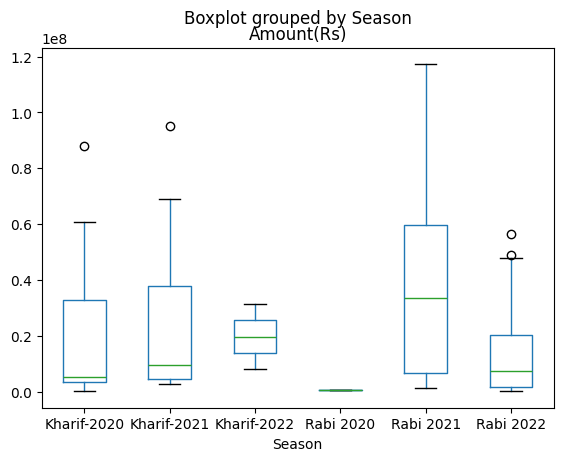

In [28]:
df1.boxplot(by="Season", column=["Amount(Rs)"], grid=False)

## After cleaning dataset

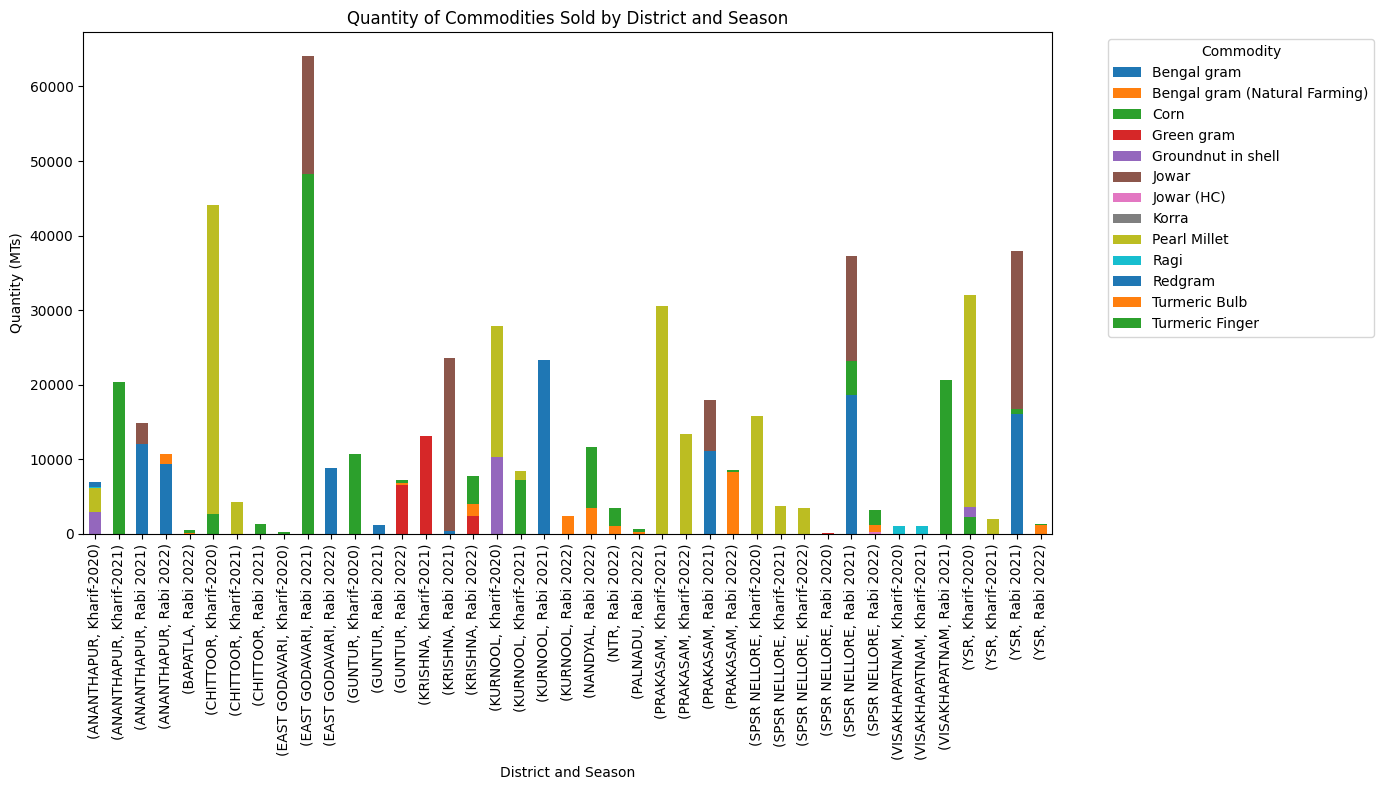

In [29]:
pivot_table = df1.pivot_table(index=['District', 'Season'], columns='Commodity', values='Qty(MTs)', aggfunc='sum', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

# Add labels and title
plt.xlabel('District and Season')
plt.ylabel('Quantity (MTs)')
plt.title('Quantity of Commodities Sold by District and Season')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

## Removing outliers with standard deviation

In [30]:
for column in ["No of Farmers", "Qty(MTs)", "Amount(Rs)"]:
    mean = df[column].mean()
    standard_deviation = df[column].std()
    lower_boundary = mean - 3 * standard_deviation
    upper_boundary = mean + 3 * standard_deviation
    print(mean, standard_deviation, lower_boundary, upper_boundary)
    df2 = df2[(df2[column] >= lower_boundary) & (df2[column] <= upper_boundary)]

1854.2474226804125 3494.8341520942495 -8630.255033602338 12338.74987896316
76567.88556701031 184284.88685336264 -476286.77499307756 629422.5461270981
171812488.00773194 355461943.36873126 -894573342.0984619 1238198318.1139257


In [31]:
df2.describe()

,Qty(MTs),No of Farmers,Amount(Rs)
count,94.000000,94.000000,9.400000e+01
mean,54208.589362,1388.691489,1.243717e+08
std,117821.092725,2324.277814,2.350808e+08
min,16.800000,3.000000,1.150800e+05
25%,1153.875000,85.750000,4.133831e+06
50%,6744.750000,243.500000,2.043352e+07
75%,27183.000000,1385.250000,8.760818e+07
max,625375.500000,9478.000000,1.143290e+09


<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

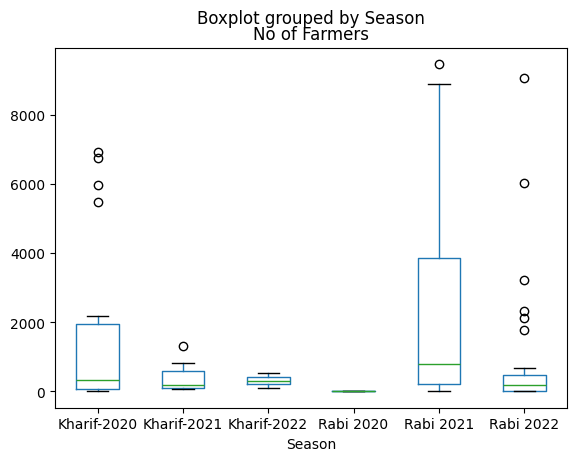

In [32]:
df2.boxplot(by="Season", column=["No of Farmers"], grid=False)

## Removing outliers with zscore

In [33]:
for column in ["No of Farmers", "Qty(MTs)", "Amount(Rs)"]:
    mean = df3[column].mean()
    standard_deviation = df3[column].std()
    df3[column+"zscore"] = (df3[column] - mean) / standard_deviation
    df3 = df3[(df3[column+"zscore"] >= -3) & (df3[column+"zscore"] <= 3)]

In [34]:
df3

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs),No of Farmerszscore,Qty(MTs)zscore,Amount(Rs)zscore
0,ANANTHAPUR,Corn,Kharif-2020,276644.5,6762,451162275.0,1.404288,1.887912,1.988211
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0,-0.512828,-0.454325,-0.517777
2,ANANTHAPUR,Jowar,Rabi 2021,2688.5,127,4973725.0,-0.494229,-0.437274,-0.512482
3,ANANTHAPUR,Bengal gram,Rabi 2022,9333.5,681,48814205.0,-0.335709,-0.380875,-0.266775
4,ANANTHAPUR,Pearl Millet,Kharif-2020,3193.0,173,5228800.0,-0.481066,-0.432992,-0.511053
...,...,...,...,...,...,...,...,...,...
93,YSR,Pearl Millet,Kharif-2020,28491.0,1377,60667625.0,-0.136558,-0.218277,-0.200342
94,YSR,Corn,Kharif-2020,2201.0,85,4001550.0,-0.506246,-0.441412,-0.517931
95,YSR,Bengal gram,Rabi 2021,16110.0,1215,81515850.0,-0.182912,-0.323360,-0.083497
96,YSR,Bengal gram,Rabi 2022,99117.5,6027,518384525.0,1.193977,0.381162,2.364962


In [35]:
df3.shape

(87, 9)

<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

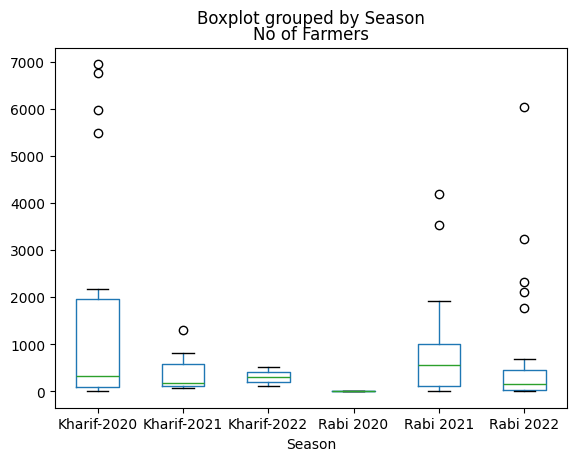

In [36]:
df3.boxplot(by="Season", column=["No of Farmers"], grid=False)